This notebook contains the comparaison between observed and modeled NEX GDDP CMIP6 data.

Notice: The modeled data only contains one point. Good to do it again but with a zone

# Packages

In [1]:
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns
import matplotlib
import geopy.distance
from matplotlib import pyplot as plt

from Functions_ImportData import import_filtered_NOAA_obs
from Functions_ImportData import import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA
from Functions_Indicators import add_year_month_season
from Functions_Indicators import str_month
from Functions_Indicators import select_station
from Functions_ImportData import import_gorongosa_obs_pr

from Graphs_functions import cdf_plot_category_or_obs
from Graphs_functions import cdf_plot_category_or_obs_attempt
from Graphs_functions import boxplots_
from Graphs_functions import boxplots_without_outliers
from Graphs_functions import compare_3_lines
from Graphs_functions import boxplots_comp

# Import data

## Observations data

### Precipitation and temperature NOAA

In [2]:
daily_sum_obs_from_NOAA = import_filtered_NOAA_obs()

In [3]:
daily_sum_obs_from_NOAA['TMAX']

0         29.0
1         27.0
2          NaN
3          NaN
4          NaN
          ... 
137721     NaN
137722     NaN
137723     NaN
137724     NaN
137725     NaN
Name: TMAX, Length: 137726, dtype: float64

In [4]:
daily_sum_obs_from_NOAA_BEIRA=select_station(daily_sum_obs_from_NOAA,'NAME','BEIRA, MZ')

In [5]:
daily_sum_obs_from_NOAA_PEMBA=select_station(daily_sum_obs_from_NOAA,'NAME','PEMBA, MZ')

In [6]:
daily_sum_obs_from_NOAA_CHIMOIO=select_station(daily_sum_obs_from_NOAA,'NAME','CHIMOIO, MZ')

In [7]:
daily_sum_obs_from_NOAA_CHIMOIO

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,...,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,Year,Month,Season,PRCP MISSING,TAVG MISSING,TMAX MISSING,TMIN MISSING
2689,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-01,0.4,",,Q",NaN,NaN,...,",,Q",20.7,",,Q",1970,Jan,Humid,0,1,0,0
2690,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-02,0.0,",,Q",NaN,NaN,...,",,Q",21.2,",,Q",1970,Jan,Humid,0,1,0,0
2691,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-03,0.0,",,Q",NaN,NaN,...,",,Q",20.5,",,Q",1970,Jan,Humid,0,1,0,0
2692,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-04,0.0,",,Q",NaN,NaN,...,",,Q",19.2,",,Q",1970,Jan,Humid,0,1,0,0
2693,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-05,0.0,",,Q",NaN,NaN,...,",,Q",20.2,",,Q",1970,Jan,Humid,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2014-12-27,NaN,NaN,24.9,"H,,S",...,NaN,21.8,",,S",2014,Dec,Humid,1,0,1,0
14160,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2014-12-28,NaN,NaN,25.9,"H,,S",...,",,S",20.0,",,S",2014,Dec,Humid,1,0,0,0
14161,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2014-12-29,23.1,",,S",24.3,"H,,S",...,",,S",20.9,",,S",2014,Dec,Humid,0,0,0,0
14162,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2014-12-30,45.0,",,S",22.9,"H,,S",...,",,S",21.0,",,S",2014,Dec,Humid,0,0,0,0


### Precipitation from Gorongosa 

In [8]:
pr_obs_gorongosa_from_gorongosa=import_gorongosa_obs_pr()

In [9]:
pr_obs_gorongosa_from_gorongosa

,time,pr,Year,Month,Season,pr MISSING
0,1980-01-01,NaN,1980,Jan,Humid,1
1,1980-01-02,NaN,1980,Jan,Humid,1
2,1980-01-03,NaN,1980,Jan,Humid,1
3,1980-01-04,NaN,1980,Jan,Humid,1
4,1980-01-05,NaN,1980,Jan,Humid,1
...,...,...,...,...,...,...
14971,2020-12-27,2.7,2020,Dec,Humid,0
14972,2020-12-28,0.0,2020,Dec,Humid,0
14973,2020-12-29,0.0,2020,Dec,Humid,0
14974,2020-12-30,138.4,2020,Dec,Humid,0


## MODELED DATA

### Precipitation NEX-GDDP-CMIP6

In [10]:
# to compare historic modelisation with NOAA observation data
path_model_pr_past = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1970-2014_CLosest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_pr_1970-2014_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path_model_pr_past)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [11]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past.sort_values(by='Model',inplace=True)

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_28388\451104406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past.sort_values(by='Model',inplace=True)


In [12]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future=import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA('pr','mm_per_day')

In [13]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Model']!='TaiESM1']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Model']!='NESM3']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Model']!='CMCC-CM2-SR5']

In [14]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Name station']=='CHIMOIO, MZ']

In [15]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Year'].between(2030,2065)]

In [16]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future.sort_values(by='Model',inplace=True)

In [17]:
# pas convaincue que le ligne suivante soit tres utile

In [18]:
# to compare projections with NOAA observation data
path_past_proj = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1950-2100\pr_1950-2100_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj = pd.read_csv(path_past_proj)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Pemba = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='Pemba_EIB']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Chimoio = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='Chimoio_WTP_EIB']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Mutua = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='WTP_Mutua_EIB']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='Gorongosa_EIB']

KeyboardInterrupt: 

### Temperature NEX-GDDP-CMIP6

In [ ]:
# to compare with NOAA observation data
path_model_tas_past = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tas\tas_Celsius_day_1950-2100_Closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tas_1950-2100.csv'
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path_model_tas_past)

tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='NESM3']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']

tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Year'].between(1970,2014)]
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past['Year'].between(1973,2013)]
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA=import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA('tas','Celsius')

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA=tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Model']!='TaiESM1']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA=tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Model']!='NESM3']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA=tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Model']!='CMCC-CM2-SR5']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Year'].between(2030,2065)]
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Name station']=='BEIRA, MZ']

### Maximum temperature NEX-GDDP-CMIP6

In [ ]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1950-2100_Closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmax_1950-2100.csv'
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA = pd.read_csv(path)
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA=add_year_month_season(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA,'Date')

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA['Year'].between(1973,2013)]
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA['Year'].between(2030,2065)]

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='NESM3']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Model']!='TaiESM1']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Model']!='NESM3']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Model']!='CMCC-CM2-SR5']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_future = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_future = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Name station']=='BEIRA, MZ']

In [ ]:
# to compare projections with NOAA observation data
path_past_proj_tasmax = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1950-2100_Closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmax_1950-2100.csv'
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj = pd.read_csv(path_past_proj_tasmax)
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj=add_year_month_season(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj,'Date')
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_CHIMOIO = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_PEMBA = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_BEIRA = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='BEIRA, MZ']

### Minimum temperature NEX GDDP CMIP6

In [ ]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmin\tasmin_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmin_1970-2014_projectsMoz.csv'
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path)
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

# Compare NOAA station with NEX-GDDP-CMIP6 data at the same emplacement

## Temperature

In [ ]:
# beira

In [ ]:
daily_sum_obs_from_NOAA_BEIRA

In [ ]:
df_obs_Beira=daily_sum_obs_from_NOAA_BEIRA#[daily_sum_obs_from_NOAA_BEIRA['Year'].between(1974,2014)]

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',df_obs_Beira,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=df_obs_Beira,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',df_obs_Beira,'TAVG','Beira')

In [ ]:
# pemba

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_future

In [ ]:
cdf_plot_category_or_obs_attempt('Pemba, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_future[['Experiment','Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Experiment',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_future

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

In [ ]:
# Chimoio

In [ ]:
df_obs_Chimoio=daily_sum_obs_from_NOAA_CHIMOIO#[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1974,2014)]

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',df_obs_Chimoio,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=df_obs_Chimoio,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',df_obs_Chimoio,'TAVG','Chimoio')

## Maximum temperature

In [ ]:
# beira

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean maximum daily temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')

In [ ]:
# pemba

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_PEMBA,'TMAX','NOAA','Annual mean maximum daily temperature °C','PEMBA')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
cdf_plot_category_or_obs_attempt('Pemba, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_future[['Experiment','Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Experiment',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','Pemba')

In [ ]:
df = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_PEMBA[['Experiment','Year','Model','Daily Maximum Near-Surface Air Temperature °C']]#.groupby(['Experiment','Year'])[['Daily Maximum Near-Surface Air Temperature °C']].mean().reset_index()
cdf_plot_category_or_obs('Pemba, MZ',df_initial=df,name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Experiment',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
# chimoio

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean maximum daily temperature °C','CHIMOIO')

In [ ]:
max(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Year'])

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Year'].between(1985,2013)][['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1985,2013)],name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Year'].between(1985,2013)],'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1985,2013)],'TMAX','Chimoio')

## Minimum temperature

In [ ]:
# Beira

In [ ]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Minimum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'TMIN','NOAA','Annual mean daily minimum temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('BEIRA, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMIN',source_obs='NOAA')

In [ ]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMIN','Beira')

In [ ]:
# pemba

In [ ]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Minimum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_PEMBA,'TMIN','NOAA','Annual mean daily minimum temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('PEMBA, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMIN',source_obs='NOAA')

In [ ]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMIN','Pemba')

In [ ]:
# Chimoio

In [ ]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Minimum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','NOAA','Annual mean daily minimum temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('CHIMOIO, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMIN',source_obs='NOAA')

In [ ]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','Chimoio')

## Precipitation

In [ ]:
# Beira

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Mean of the daily precipitation rate mm/day','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_BEIRA,'PRCP','Beira')

In [ ]:
# pemba

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Mean of the daily precipitation rate mm/day','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_PEMBA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Pemba')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_PEMBA,'PRCP','Pemba')

In [ ]:
# Chimoio past emplacement station

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Chimoio')

In [20]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Model']!='NESM3']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Model']!='TaiESM1']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Model']!='CMCC-CM2-SR5']

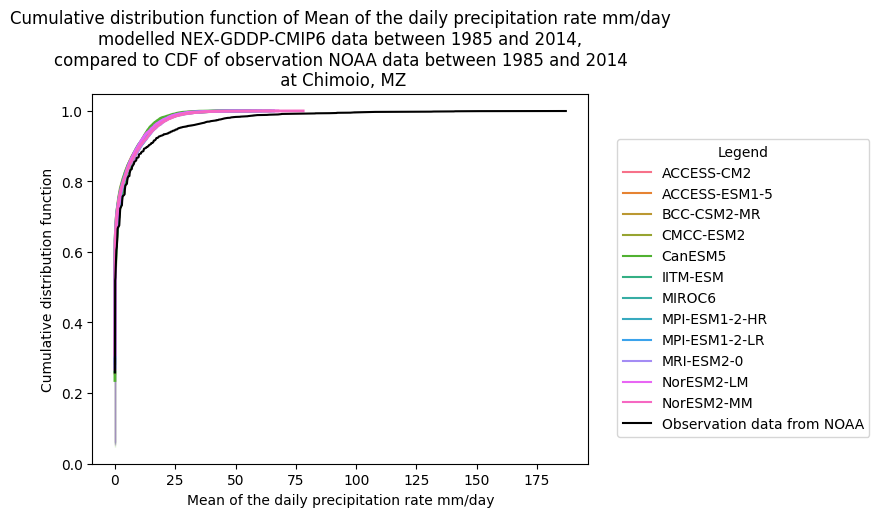

In [21]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Year'].between(1985,2014)][['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1985,2014)],name_column_obs='PRCP',source_obs='NOAA')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


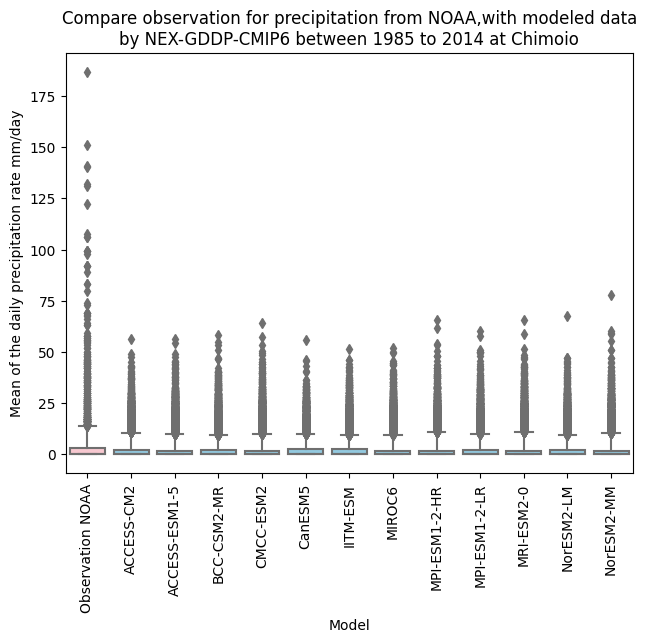

In [22]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Year'].between(1985,2014)],'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1985,2014)],'PRCP','Chimoio')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


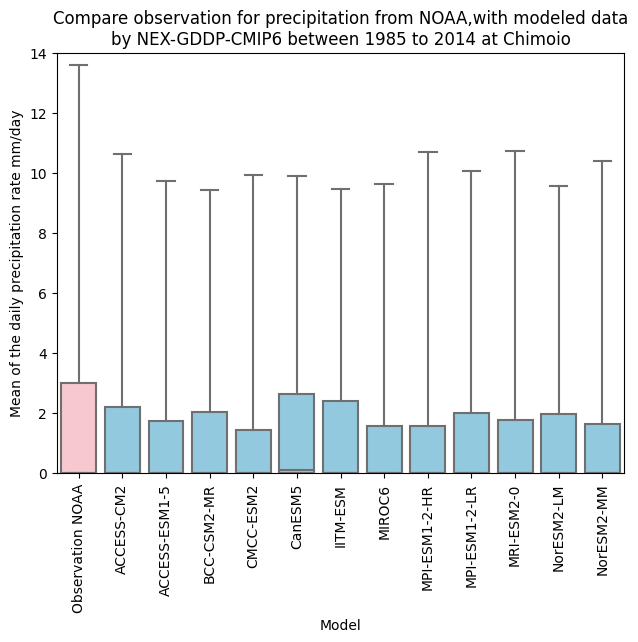

In [23]:
boxplots_without_outliers('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Year'].between(1985,2014)],'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1985,2014)],'PRCP','Chimoio')

In [ ]:
# chimoio future emplacement station

In [ ]:
set(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment'])

In [ ]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_spp126 = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment']=='ssp126']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp245 = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment']=='ssp245']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp370 = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment']=='ssp370']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp585 = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment']=='ssp585']

In [ ]:
sns.lineplot(data=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_spp126, x= 'Year', y = 'Mean of the daily precipitation rate mm per day',hue='Model',errorbar=('pi',80))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_spp126[['Model','Year','Mean of the daily precipitation rate mm per day']],name_column_df='Mean of the daily precipitation rate mm per day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_spp126,'Mean of the daily precipitation rate mm per day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

In [ ]:
boxplots_without_outliers('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_spp126,'Mean of the daily precipitation rate mm per day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

In [ ]:
sns.lineplot(data=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp245, x= 'Year', y = 'Mean of the daily precipitation rate mm per day',hue='Model',errorbar=('pi',80))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp245[['Model','Year','Mean of the daily precipitation rate mm per day']],name_column_df='Mean of the daily precipitation rate mm per day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp245,'Mean of the daily precipitation rate mm per day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

In [ ]:
boxplots_without_outliers('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp245,'Mean of the daily precipitation rate mm per day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

In [ ]:
sns.lineplot(data=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp370, x= 'Year', y = 'Mean of the daily precipitation rate mm per day',hue='Model',errorbar=('pi',80))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp370[['Model','Year','Mean of the daily precipitation rate mm per day']],name_column_df='Mean of the daily precipitation rate mm per day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp370,'Mean of the daily precipitation rate mm per day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

In [ ]:
boxplots_without_outliers('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp370,'Mean of the daily precipitation rate mm per day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

In [ ]:
sns.lineplot(data=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp585, x= 'Year', y = 'Mean of the daily precipitation rate mm per day',hue='Model',errorbar=('pi',80))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp585[['Model','Year','Mean of the daily precipitation rate mm per day']],name_column_df='Mean of the daily precipitation rate mm per day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp585,'Mean of the daily precipitation rate mm per day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

In [ ]:
boxplots_without_outliers('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp585,'Mean of the daily precipitation rate mm per day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

In [ ]:
def boxplots_comp(climate_var,df1,name_col1,df1_,name_col1_,name_station,fliersize_=0, max_y_lim=120,violin=False):#df2,name_col2,name_station,fliersize_=0):
        
    df1_=df1_.rename(columns={name_col1_:name_col1})

    df_boxplot=pd.concat([df1,df1_])

    fig,ax=plt.subplots()
    plt.tight_layout() # Adjust the padding between and around subplots.
    
    if violin:
        sns.violinplot(data=df_boxplot,x=df_boxplot.Model, y=name_col1,hue='Experiment',fliersize=fliersize_,whis=[10,90],ax=ax)#,palette=cols)
    else:
        sns.boxplot(data=df_boxplot,x=df_boxplot.Model, y=name_col1,hue='Experiment',fliersize=fliersize_,whis=[10,90],ax=ax)#,palette=cols)

    # display the legend
    handles, labels=ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.2, 0.8),title='Legend')
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    ax.set_ylim(0,max_y_lim)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.title('Compare past ('+str(min(df1['Year']))+' to '+str(max(df1['Year']))+') and future ('+str(min(df1_['Year']))+' to '+str(max(df1_['Year']))+')\n'+climate_var+' NEX-GDDP-CMIP6 modelled data at '+name_station)

    #path_figure=r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures\testBoxplotObs.png'
    #plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written

    plt.show()

In [ ]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Model']!='TaiESM1']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Model']!='CMCC-CM2-SR5']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Model']!='NESM3']

In [ ]:
boxplots_comp('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future,'Mean of the daily precipitation rate mm per day','Chimoio',fliersize_=1)

In [ ]:
boxplots_comp('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future,'Mean of the daily precipitation rate mm per day','Chimoio',fliersize_=1,violin=True)

In [ ]:
boxplots_comp('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future,'Mean of the daily precipitation rate mm per day','Chimoio',fliersize_=0,max_y_lim=12)

In [ ]:
boxplots_comp('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future,'Mean of the daily precipitation rate mm per day','Chimoio',fliersize_=0,max_y_lim=12,violin=True)

In [ ]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past

In [ ]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp585

In [ ]:
# gorongosa (close to chimoio)

In [ ]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare =pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa['Year'].between(1980,2014)]

In [ ]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare

In [ ]:
pr_obs_gorongosa_from_gorongosa_to_comp = pr_obs_gorongosa_from_gorongosa[pr_obs_gorongosa_from_gorongosa['Year'].between(1980,2014)]

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare,'Mean of the daily precipitation rate mm_per_day','NEX-GDDP-CMIP6',pr_obs_gorongosa_from_gorongosa_to_comp,'pr','\nmeteorological station\ngorongosa','Yearly mean of the mean daily precipitation rate mm/day','Gorongosa')

In [ ]:
cdf_plot_category_or_obs('Gorongosa, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare[['Model','Year','Mean of the daily precipitation rate mm_per_day']],name_column_df='Mean of the daily precipitation rate mm_per_day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=pr_obs_gorongosa_from_gorongosa_to_comp,name_column_obs='pr',source_obs='\nmeteorological station\ngorongosa')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare,'Mean of the daily precipitation rate mm_per_day',pr_obs_gorongosa_from_gorongosa_to_comp,'pr','Gorongosa')

# What needs to be changed ?
## Which models need to be taken out ?

those graphs confirm that for precipitation and maximum temperature, no need to kill a model. But, for temperature and minimum temeprature, 'TAIESM1' and 'CMCC-CM2-SR5' are not following the trend. Take out those 2 models for all climate variable

In [ ]:
# take out models for maximum temperature
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='NESM3']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for average temperature past
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='NESM3']

tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for average temperature future
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Model']!='CMCC-CM2-SR5']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Model']!='TaiESM1']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Model']!='NESM3']

tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for precipitation
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='NESM3']

pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for minimum temperature
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='NESM3']


tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

## Temperature : take out some models

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','Beira')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','CHIMOIO')

In [ ]:
set(tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment'])

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp126=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment']=='ssp126']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp245=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment']=='ssp245']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp370=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment']=='ssp370']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp585=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment']=='ssp585']

In [ ]:
sns.lineplot(data=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp126, x= 'Year', y ='Daily Near-Surface Air Temperature °C',hue='Model',errorbar=('pi',80))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp126[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp126,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','CHIMOIO')

In [ ]:
sns.lineplot(data=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp245, x= 'Year', y ='Daily Near-Surface Air Temperature °C',hue='Model',errorbar=('pi',80))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment']=='ssp245'][['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp245,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','CHIMOIO')

In [ ]:
sns.lineplot(data=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp370, x= 'Year', y ='Daily Near-Surface Air Temperature °C',hue='Model',errorbar=('pi',80))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment']=='ssp370'][['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp370,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','CHIMOIO')

In [ ]:
sns.lineplot(data=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp585, x= 'Year', y ='Daily Near-Surface Air Temperature °C',hue='Model',errorbar=('pi',80))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future['Experiment']=='ssp585'][['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future_ssp585,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','CHIMOIO')

## Maximum temperature : take out some models (the ones that were not performing well for average temperature) from modelled data and some extreme values that are not plausible from observation data

In [ ]:
# chimoio

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean daily maximum temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('CHIMOIO, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','Chimoio')

In [ ]:
# pemba

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','NOAA','Annual mean daily maximum temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('PEMBA, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','Pemba')

In [ ]:
# Beira

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean daily maximum temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')